In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pso import PSOOptimizer
from models import KNNWrapper, DecisionTreeWrapper, MLPWrapper
from datasets import (
    get_dataset_wine,
    get_dataset_digits,
    get_dataset_synthetic_multiclass,
)

plt.style.use("default")  

Creo datasets

In [2]:
datasets = [
    get_dataset_synthetic_multiclass(),  # (X, y, name)
    get_dataset_wine(),
    get_dataset_digits(),
]

for X, y, name in datasets:
    print(f"{name}: X shape = {X.shape}, y shape = {y.shape}")


synthetic_4class: X shape = (2000, 20), y shape = (2000,)
wine: X shape = (178, 13), y shape = (178,)
digits: X shape = (1797, 64), y shape = (1797,)


Registro modelos

In [3]:
models = [
    (KNNWrapper, "kNN"),
    (DecisionTreeWrapper, "DecisionTree"),
    (MLPWrapper, "MLP"),
]

for cls, name in models:
    print("Modelo registrado:", name)


Modelo registrado: kNN
Modelo registrado: DecisionTree
Modelo registrado: MLP


Función para correr un experimento 

In [4]:
from sklearn.model_selection import cross_val_score

def run_single_experiment(
    model_wrapper_cls,
    X,
    y,
    model_name,
    dataset_name,
    alpha_complexity=0.0,
    pso_config=None,
    random_state=0,
    plot_convergence=True,
):
    """
    Corre una sola corrida de PSO para un modelo y dataset.
    Devuelve dict con info del mejor resultado y la historia de convergencia.
    """
    if pso_config is None:
        pso_config = dict(
            num_particles=15,
            max_iter=25,
            w=0.7,
            c1=1.5,
            c2=1.5,
            random_state=random_state,
        )

    wrapper = model_wrapper_cls(
        X=X,
        y=y,
        alpha_complexity=alpha_complexity,
        cv=5,
        random_state=random_state,
    )

    bounds = wrapper.param_bounds

    def objective_fn(x):
        return wrapper.evaluate(x)

    optimizer = PSOOptimizer(**pso_config)
    best_pos, best_fit, history = optimizer.optimize(objective_fn, bounds)

    # Recalcular accuracy sin penalización, sólo para reportar:
    params = wrapper.decode(best_pos)
    model = wrapper.build_model(params)
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy", n_jobs=-1)
    best_acc = scores.mean()

    if plot_convergence:
        plt.figure(figsize=(6, 4))
        plt.plot(history, marker="o")
        plt.xlabel("Iteración")
        plt.ylabel("Mejor fitness global")
        plt.title(f"Convergencia - {model_name} en {dataset_name}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    result = {
        "model_name": model_name,
        "dataset_name": dataset_name,
        "best_params": params,
        "best_fitness": best_fit,
        "best_accuracy": best_acc,
        "history": history,
    }
    return result


Un run por combinacion de modelo y dataset

=== kNN en synthetic_4class ===
[PSO] Iter 1/25 - Best fitness: 0.2522 - Best global position: [12.94638452  1.40196228  0.51483036]
[PSO] Iter 2/25 - Best fitness: 0.2522 - Best global position: [12.94638452  1.40196228  0.51483036]
[PSO] Iter 3/25 - Best fitness: 0.2447 - Best global position: [8.09334564 1.73501946 0.53093024]
[PSO] Iter 4/25 - Best fitness: 0.2447 - Best global position: [8.09334564 1.73501946 0.53093024]
[PSO] Iter 5/25 - Best fitness: 0.2447 - Best global position: [8.09334564 1.73501946 0.53093024]
[PSO] Iter 6/25 - Best fitness: 0.2447 - Best global position: [8.09334564 1.73501946 0.53093024]
[PSO] Iter 7/25 - Best fitness: 0.2447 - Best global position: [8.09334564 1.73501946 0.53093024]
[PSO] Iter 8/25 - Best fitness: 0.2447 - Best global position: [8.09334564 1.73501946 0.53093024]
[PSO] Iter 9/25 - Best fitness: 0.2447 - Best global position: [8.09334564 1.73501946 0.53093024]
[PSO] Iter 10/25 - Best fitness: 0.2447 - Best global position: [8.09334564 1.73

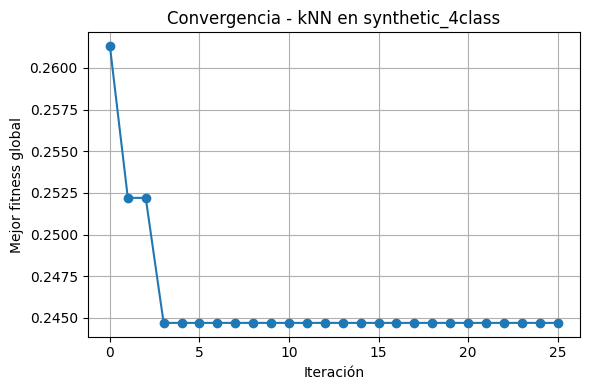

=== DecisionTree en synthetic_4class ===
[PSO] Iter 1/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 2/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 3/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 4/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 5/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 6/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 7/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 8/25 - Best fitness: 0.4455 - Best global position: [ 7.2685086  16.28769846  9.11127763  0.8958512 ]
[PSO] Iter 9/25 - Best fitness: 0.4455 - Best global po

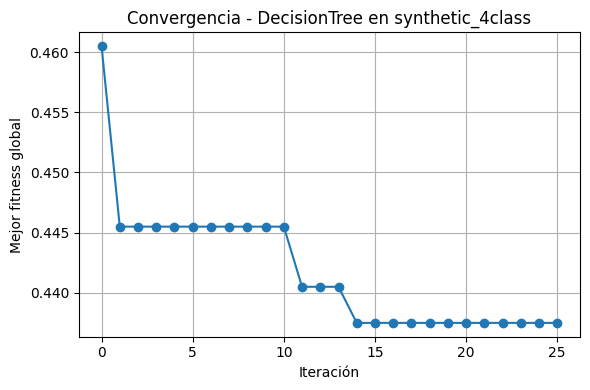

=== MLP en synthetic_4class ===
[PSO] Iter 1/25 - Best fitness: 0.2374 - Best global position: [66.7866641  -3.97521185 -1.81970503]
[PSO] Iter 2/25 - Best fitness: 0.2315 - Best global position: [70.17299312 -4.07395076 -2.03825496]
[PSO] Iter 3/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.23248732]
[PSO] Iter 4/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.23248732]
[PSO] Iter 5/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.23248732]
[PSO] Iter 6/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.23248732]
[PSO] Iter 7/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.23248732]
[PSO] Iter 8/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.23248732]
[PSO] Iter 9/25 - Best fitness: 0.2240 - Best global position: [69.89432528 -5.         -2.23248732]
[PSO] Iter 10/25 - Best fitness: 0.2240 - Best global posit

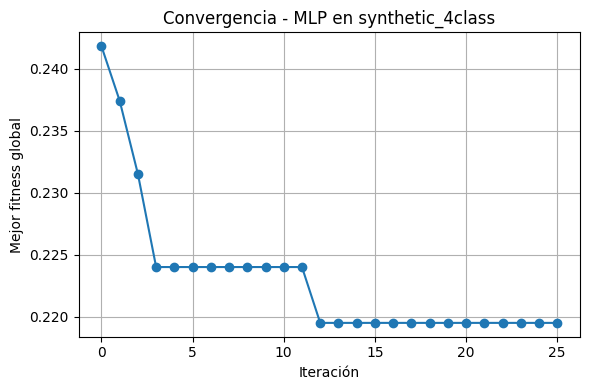

=== kNN en wine ===
[PSO] Iter 1/25 - Best fitness: 0.2198 - Best global position: [3.14638452 1.30857898 0.68304895]
[PSO] Iter 2/25 - Best fitness: 0.1914 - Best global position: [2.24707664 1.35623886 0.62690935]
[PSO] Iter 3/25 - Best fitness: 0.1910 - Best global position: [1.         1.20991683 0.64860504]
[PSO] Iter 4/25 - Best fitness: 0.1910 - Best global position: [1.         1.20991683 0.64860504]
[PSO] Iter 5/25 - Best fitness: 0.1910 - Best global position: [1.         1.20991683 0.64860504]
[PSO] Iter 6/25 - Best fitness: 0.1910 - Best global position: [1.         1.20991683 0.64860504]
[PSO] Iter 7/25 - Best fitness: 0.1910 - Best global position: [1.         1.20991683 0.64860504]
[PSO] Iter 8/25 - Best fitness: 0.1910 - Best global position: [1.         1.20991683 0.64860504]
[PSO] Iter 9/25 - Best fitness: 0.1910 - Best global position: [1.         1.20991683 0.64860504]
[PSO] Iter 10/25 - Best fitness: 0.1910 - Best global position: [1.         1.20991683 0.64860504]

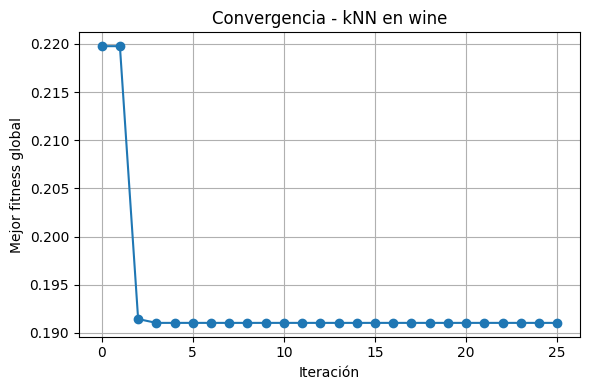

=== DecisionTree en wine ===
[PSO] Iter 1/25 - Best fitness: 0.0713 - Best global position: [ 9.71939974 29.29957741  3.65614296  0.29162406]
[PSO] Iter 2/25 - Best fitness: 0.0703 - Best global position: [ 9.40966285 28.75212168  3.60670204  0.29632572]
[PSO] Iter 3/25 - Best fitness: 0.0703 - Best global position: [ 9.40966285 28.75212168  3.60670204  0.29632572]
[PSO] Iter 4/25 - Best fitness: 0.0703 - Best global position: [ 9.40966285 28.75212168  3.60670204  0.29632572]
[PSO] Iter 5/25 - Best fitness: 0.0693 - Best global position: [ 7.56858529 25.04457035  3.55461775  0.24154011]
[PSO] Iter 6/25 - Best fitness: 0.0693 - Best global position: [ 7.56858529 25.04457035  3.55461775  0.24154011]
[PSO] Iter 7/25 - Best fitness: 0.0693 - Best global position: [ 7.56858529 25.04457035  3.55461775  0.24154011]
[PSO] Iter 8/25 - Best fitness: 0.0683 - Best global position: [ 7.04371524 25.16406515  3.54784175  0.26964697]
[PSO] Iter 9/25 - Best fitness: 0.0673 - Best global position: [ 6.

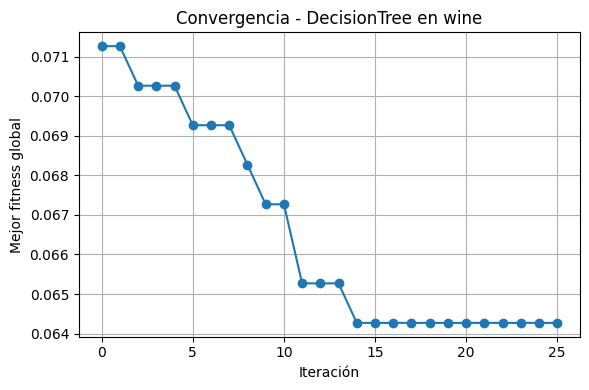

=== MLP en wine ===
[PSO] Iter 1/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 2/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 3/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 4/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 5/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 6/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 7/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 8/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 9/25 - Best fitness: 0.1931 - Best global position: [72.23007978 -2.46271092 -1.62690382]
[PSO] Iter 10/25 - Best fitness: 0.1931 - Best global position: [72.230

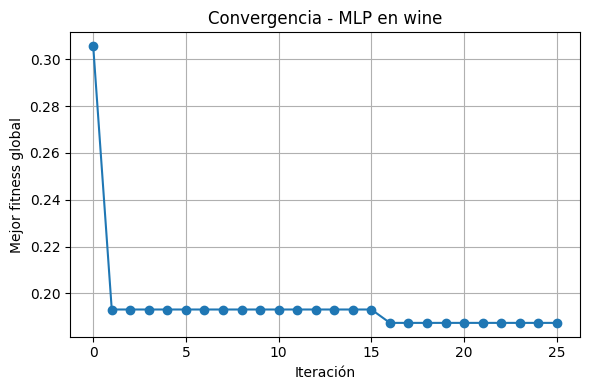

=== kNN en digits ===
[PSO] Iter 1/25 - Best fitness: 0.0420 - Best global position: [8.57177244 2.54139605 0.69312112]
[PSO] Iter 2/25 - Best fitness: 0.0346 - Best global position: [2.94364854 2.16482621 0.43541699]
[PSO] Iter 3/25 - Best fitness: 0.0343 - Best global position: [1.         2.53464319 0.41271412]
[PSO] Iter 4/25 - Best fitness: 0.0343 - Best global position: [1.         2.53464319 0.41271412]
[PSO] Iter 5/25 - Best fitness: 0.0343 - Best global position: [1.         2.53464319 0.41271412]
[PSO] Iter 6/25 - Best fitness: 0.0343 - Best global position: [1.         2.53464319 0.41271412]
[PSO] Iter 7/25 - Best fitness: 0.0343 - Best global position: [1.         2.53464319 0.41271412]
[PSO] Iter 8/25 - Best fitness: 0.0343 - Best global position: [1.         2.53464319 0.41271412]
[PSO] Iter 9/25 - Best fitness: 0.0343 - Best global position: [1.         2.53464319 0.41271412]
[PSO] Iter 10/25 - Best fitness: 0.0343 - Best global position: [1.         2.53464319 0.4127141

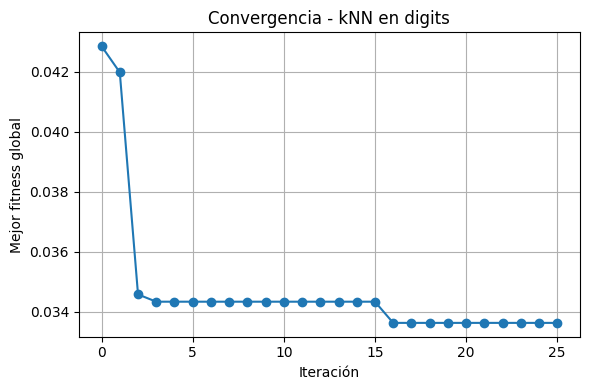

=== DecisionTree en digits ===
[PSO] Iter 1/25 - Best fitness: 0.2577 - Best global position: [ 9.30588646 41.96855341 14.30503694  0.44989331]
[PSO] Iter 2/25 - Best fitness: 0.2577 - Best global position: [ 9.30588646 41.96855341 14.30503694  0.44989331]
[PSO] Iter 3/25 - Best fitness: 0.2500 - Best global position: [ 7.67794848 38.96134256 14.97796587  0.46656919]
[PSO] Iter 4/25 - Best fitness: 0.2500 - Best global position: [ 7.67794848 38.96134256 14.97796587  0.46656919]
[PSO] Iter 5/25 - Best fitness: 0.2500 - Best global position: [ 7.67794848 38.96134256 14.97796587  0.46656919]
[PSO] Iter 6/25 - Best fitness: 0.2500 - Best global position: [ 7.67794848 38.96134256 14.97796587  0.46656919]
[PSO] Iter 7/25 - Best fitness: 0.2500 - Best global position: [ 7.67794848 38.96134256 14.97796587  0.46656919]
[PSO] Iter 8/25 - Best fitness: 0.2500 - Best global position: [ 7.67794848 38.96134256 14.97796587  0.46656919]
[PSO] Iter 9/25 - Best fitness: 0.2500 - Best global position: [ 

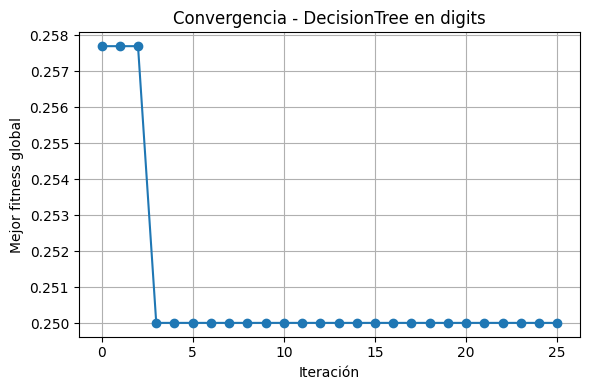

=== MLP en digits ===
[PSO] Iter 1/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 2/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 3/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 4/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 5/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 6/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 7/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 8/25 - Best fitness: 0.0780 - Best global position: [87.14944614 -1.09685022 -1.70323343]
[PSO] Iter 9/25 - Best fitness: 0.0778 - Best global position: [58.33037115 -0.10668982 -1.73168784]
[PSO] Iter 10/25 - Best fitness: 0.0778 - Best global position: [58.3

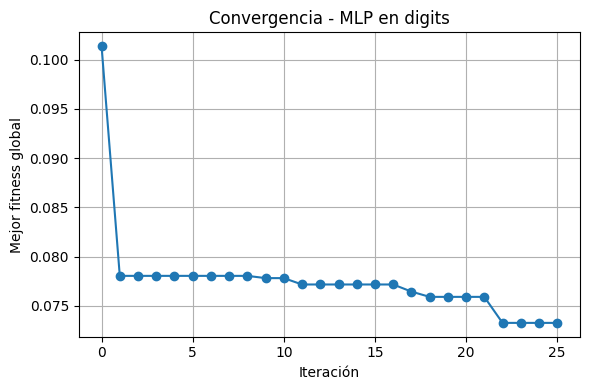

,Dataset,Modelo,BestAccuracy,BestFitness
7,digits,DecisionTree,0.757993,0.250007
8,digits,MLP,0.937126,0.073274
6,digits,kNN,0.967171,0.033629
1,synthetic_4class,DecisionTree,0.573500,0.437500
2,synthetic_4class,MLP,0.794500,0.219500
0,synthetic_4class,kNN,0.758500,0.244700
4,wine,DecisionTree,0.938730,0.064270
5,wine,MLP,0.826984,0.187416
3,wine,kNN,0.809365,0.191035


In [5]:
alpha_complexity = 0.02  # penalización de complejidad (podés setearlo en 0 si querés)
results_single = []

for (X, y, ds_name) in datasets:
    for model_cls, model_name in models:
        print(f"=== {model_name} en {ds_name} ===")
        res = run_single_experiment(
            model_wrapper_cls=model_cls,
            X=X,
            y=y,
            model_name=model_name,
            dataset_name=ds_name,
            alpha_complexity=alpha_complexity,
            pso_config=dict(
                num_particles=15,
                max_iter=25,
                w=0.7,
                c1=1.5,
                c2=1.5,
                random_state=42,
            ),
            random_state=42,
            plot_convergence=True,  # muestra la curva
        )
        results_single.append(res)

# Pasar a DataFrame para ver resumen lindo
rows = []
for r in results_single:
    rows.append({
        "Dataset": r["dataset_name"],
        "Modelo": r["model_name"],
        "BestAccuracy": r["best_accuracy"],
        "BestFitness": r["best_fitness"],
    })

df_summary_single = pd.DataFrame(rows)
df_summary_single.sort_values(["Dataset", "Modelo"], inplace=True)
df_summary_single

Varios runs de PSO por combinación para ver variabilidad y dibujar boxplots

In [6]:
N_RUNS = 5  # o 10 si me da el tiempo despues

alpha_complexity = 0.02
all_runs = []  # lista de dicts con resultados por run

for (X, y, ds_name) in datasets:
    for model_cls, model_name in models:
        print(f"\n### Múltiples runs: {model_name} en {ds_name} ###")
        for run_id in range(N_RUNS):
            seed = 100 + run_id  # o lo que quieras
            print(f"  Run {run_id+1}/{N_RUNS} (seed={seed})")

            res = run_single_experiment(
                model_wrapper_cls=model_cls,
                X=X,
                y=y,
                model_name=model_name,
                dataset_name=ds_name,
                alpha_complexity=alpha_complexity,
                pso_config=dict(
                    num_particles=15,
                    max_iter=25,
                    w=0.7,
                    c1=1.5,
                    c2=1.5,
                    random_state=seed,
                ),
                random_state=seed,
                plot_convergence=False,  # para que no exploten gráficos
            )

            res["run_id"] = run_id
            all_runs.append(res)

# DataFrame con todos los runs
rows = []
for r in all_runs:
    rows.append({
        "Dataset": r["dataset_name"],
        "Modelo": r["model_name"],
        "Run": r["run_id"],
        "BestAccuracy": r["best_accuracy"],
        "BestFitness": r["best_fitness"],
    })

df_all_runs = pd.DataFrame(rows)
df_all_runs.head()



### Múltiples runs: kNN en synthetic_4class ###
  Run 1/5 (seed=100)
[PSO] Iter 1/25 - Best fitness: 0.2515 - Best global position: [4.54755482 2.04824165 0.54655052]
[PSO] Iter 2/25 - Best fitness: 0.2508 - Best global position: [12.23438532  1.9681888   0.50114087]
[PSO] Iter 3/25 - Best fitness: 0.2460 - Best global position: [9.91618019 2.02814095 0.57184702]
[PSO] Iter 4/25 - Best fitness: 0.2448 - Best global position: [7.41837612 2.09497504 0.54601555]
[PSO] Iter 5/25 - Best fitness: 0.2447 - Best global position: [7.93077946 1.96835951 0.6939086 ]
[PSO] Iter 6/25 - Best fitness: 0.2447 - Best global position: [7.93077946 1.96835951 0.6939086 ]
[PSO] Iter 7/25 - Best fitness: 0.2447 - Best global position: [7.93077946 1.96835951 0.6939086 ]
[PSO] Iter 8/25 - Best fitness: 0.2447 - Best global position: [7.93077946 1.96835951 0.6939086 ]
[PSO] Iter 9/25 - Best fitness: 0.2447 - Best global position: [7.93077946 1.96835951 0.6939086 ]
[PSO] Iter 10/25 - Best fitness: 0.2447 - Bes

,Dataset,Modelo,Run,BestAccuracy,BestFitness
0,synthetic_4class,kNN,0,0.7585,0.2447
1,synthetic_4class,kNN,1,0.7585,0.2447
2,synthetic_4class,kNN,2,0.7585,0.2447
3,synthetic_4class,kNN,3,0.7585,0.2447
4,synthetic_4class,kNN,4,0.7585,0.2447


C:\Users\Trini\AppData\Local\Temp\ipykernel_6492\21212394.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


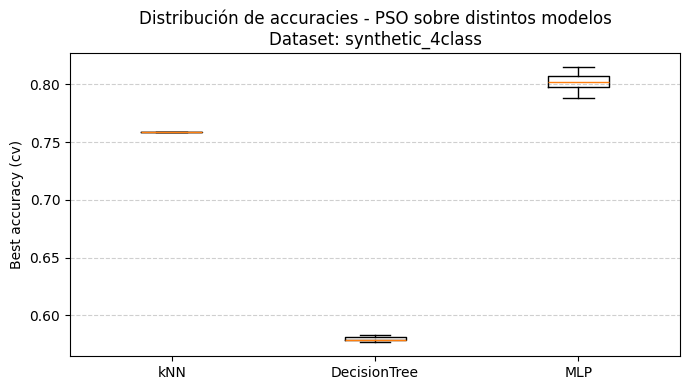

C:\Users\Trini\AppData\Local\Temp\ipykernel_6492\21212394.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


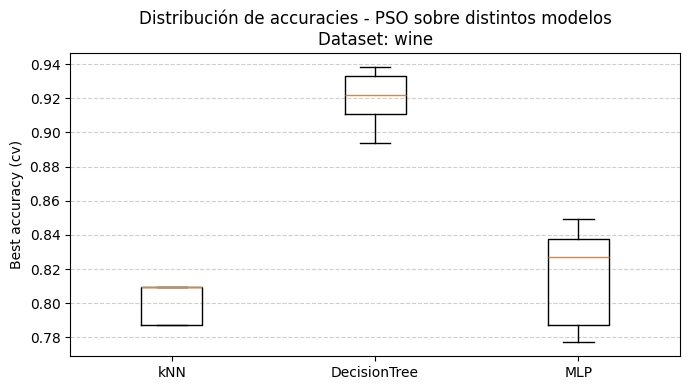

C:\Users\Trini\AppData\Local\Temp\ipykernel_6492\21212394.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


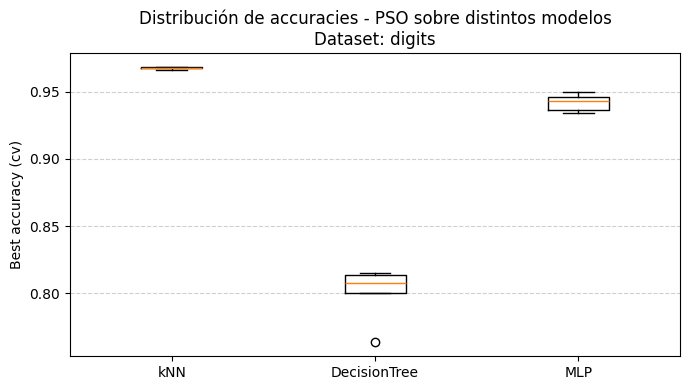

In [7]:
for (X, y, ds_name) in datasets:
    df_ds = df_all_runs[df_all_runs["Dataset"] == ds_name]

    plt.figure(figsize=(7, 4))
    data_to_plot = []
    labels = []

    for model_cls, model_name in models:
        accs = df_ds[df_ds["Modelo"] == model_name]["BestAccuracy"].values
        if len(accs) > 0:
            data_to_plot.append(accs)
            labels.append(model_name)

    plt.boxplot(data_to_plot, labels=labels)
    plt.ylabel("Best accuracy (cv)")
    plt.title(f"Distribución de accuracies - PSO sobre distintos modelos\nDataset: {ds_name}")
    plt.grid(True, axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()
